In [34]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [35]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
import mapfxn as mf
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
reload(mf)

plt.rcParams.update({'font.size': 11})
# font = {'family' : 'normal',
# 'weight' : 'bold',
# 'size'   : 11}


In [36]:
w = nc.Dataset('../UTILS/sector_landmask.nc')  
sectormask = (w['sectormask'][:])
sm_so = sectormask[0:37,:]

tdir = './averaged_forcing/MetOffice/'
yrs = np.arange(1950,2021,1)
yrlen = (len(yrs))

MO_monthly_byreg_uvel = np.zeros([yrlen,12,4])
MO_monthly_byreg_wspd = np.zeros([yrlen,12,4])

for i in range(0,yrlen):
    yr = yrs[i]
    w = nc.Dataset(f'{tdir}MetOffice_MONTHLY_SO_wind{yr}.nc')
    uwind = w['uwind10m'][:] 
    wspd = w['wspd10m'][:]
    
    for m in range(0,12):
        for s in range(1,5):
            tuwind = uwind[m,:,:]
            twspd = wspd[m,:,:]
            if s == 1:
                MO_monthly_byreg_uvel[i,m,s-1] = np.nanmean(tuwind[sm_so>1])
                MO_monthly_byreg_wspd[i,m,s-1] = np.nanmean(twspd[sm_so>1])
                
            else:
                MO_monthly_byreg_uvel[i,m,s-1] = np.nanmean(tuwind[sm_so==s])
                MO_monthly_byreg_wspd[i,m,s-1] = np.nanmean(twspd[sm_so==s])
                
    

In [37]:
tdir = './averaged_forcing/ERA5/'
yrs = np.arange(1950,2021,1)
yrlen = (len(yrs))

ERA5_monthly_byreg_uvel = np.zeros([yrlen,12,4])
ERA5_monthly_byreg_wspd = np.zeros([yrlen,12,4])

for i in range(0,yrlen):
    yr = yrs[i]
    w = nc.Dataset(f'{tdir}ERA5_MONTHLY_SO_wind{yr}.nc')
    uwind = w['uwind10m'][:] 
    wspd = w['wspd10m'][:]
    
    for m in range(0,12):
        for s in range(1,5):
            tuwind = uwind[m,:,:]
            twspd = wspd[m,:,:]
            if s == 1:
                ERA5_monthly_byreg_uvel[i,m,s-1] = np.nanmean(tuwind[sm_so>1])
                ERA5_monthly_byreg_wspd[i,m,s-1] = np.nanmean(twspd[sm_so>1])
                
            else:
                ERA5_monthly_byreg_uvel[i,m,s-1] = np.nanmean(tuwind[sm_so==s])
                ERA5_monthly_byreg_wspd[i,m,s-1] = np.nanmean(twspd[sm_so==s])

In [38]:
tdir = './averaged_forcing/NCEP/'
NCEP_monthly_byreg_wspd = np.zeros([yrlen,12,4])

for i in range(0,yrlen):
    yr = yrs[i]
    w = nc.Dataset(f'{tdir}NCEP_MONTHLY_SO_wind{yr}.nc')
    #uwind = w['uwind10m'][:] 
    wspd = w['wspd10m'][:]
    
    for m in range(0,12):
        for s in range(1,5):
            tuwind = uwind[m,:,:]
            twspd = wspd[m,:,:]
            if s == 1:
                #NCEP_monthly_byreg_uvel[i,m,s-1] = np.nanmean(tuwind[sm_so>1])
                NCEP_monthly_byreg_wspd[i,m,s-1] = np.nanmean(twspd[sm_so>1])
                
            else:
                #NCEP_monthly_byreg_uvel[i,m,s-1] = np.nanmean(tuwind[sm_so==s])
                NCEP_monthly_byreg_wspd[i,m,s-1] = np.nanmean(twspd[sm_so==s])

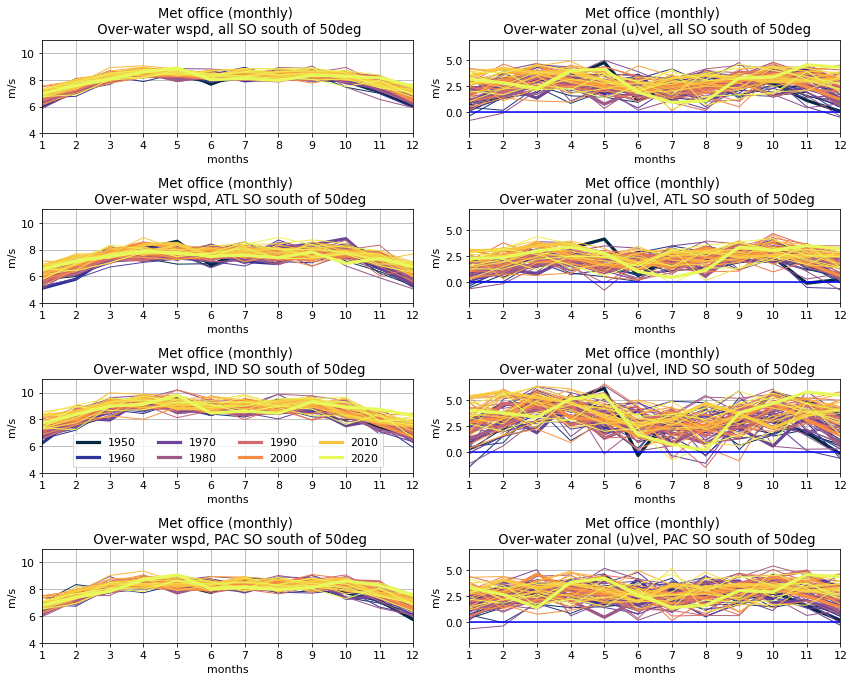

In [39]:
mons = np.arange(1,13,1)
fact = 0.6
seg = yrlen
shift = 2
tcm = cm.thermal
lw = 1

fig, axs = plt.subplots(4,2, figsize=(20*fact, 16*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

plotrs = [MO_monthly_byreg_wspd[:,:,0],MO_monthly_byreg_uvel[:,:,0],\
          MO_monthly_byreg_wspd[:,:,1],MO_monthly_byreg_uvel[:,:,1],\
          MO_monthly_byreg_wspd[:,:,2],MO_monthly_byreg_uvel[:,:,2],\
          MO_monthly_byreg_wspd[:,:,3],MO_monthly_byreg_uvel[:,:,3]]
tits = ['Met office (monthly) \n Over-water wspd, all SO south of 50deg','Met office (monthly) \n Over-water zonal (u)vel, all SO south of 50deg',
        'Met office (monthly) \n Over-water wspd, ATL SO south of 50deg','Met office (monthly) \n Over-water zonal (u)vel, ATL SO south of 50deg',
        'Met office (monthly) \n Over-water wspd, IND SO south of 50deg','Met office (monthly) \n Over-water zonal (u)vel, IND SO south of 50deg',
        'Met office (monthly) \n Over-water wspd, PAC SO south of 50deg','Met office (monthly) \n Over-water zonal (u)vel, PAC SO south of 50deg']


for p in range(0,8):
    tplt = plotrs[p]
    for y in range(0,seg):
        axs[p].set_title(tits[p])
        axs[p].plot(mons,tplt[y,:],color = tcm(1.*(y+shift)/seg), linewidth = 1)

        if ((y == 0) | (y == 10) | (y == 20) | (y == 30)\
            | (y == 40) | (y == 50 ) | (y == 60 )| (y == 70 )) :      
            axs[p].plot(mons,tplt[y,:],color = tcm(1.*(y+shift)/seg),\
                    label = f'{yrs[y]}', linewidth = lw+2.2)

axs[0].set_ylim([4,11]);axs[1].set_ylim([-2,7])
axs[2].set_ylim([4,11]);axs[3].set_ylim([-2,7])
axs[4].set_ylim([4,11]);axs[5].set_ylim([-2,7])
axs[6].set_ylim([4,11]);axs[7].set_ylim([-2,7])

for p in range(0,8):
    axs[p].grid(); axs[p].set_xlim([1,12])
    axs[p].axhline(y=0, color = 'b')
    axs[p].set_xticks(np.arange(1,13,1))
    axs[p].set_xlabel('months'); axs[p].set_ylabel('m/s')

axs[4].legend(ncol = 4, loc = 'best', )
plt.tight_layout()

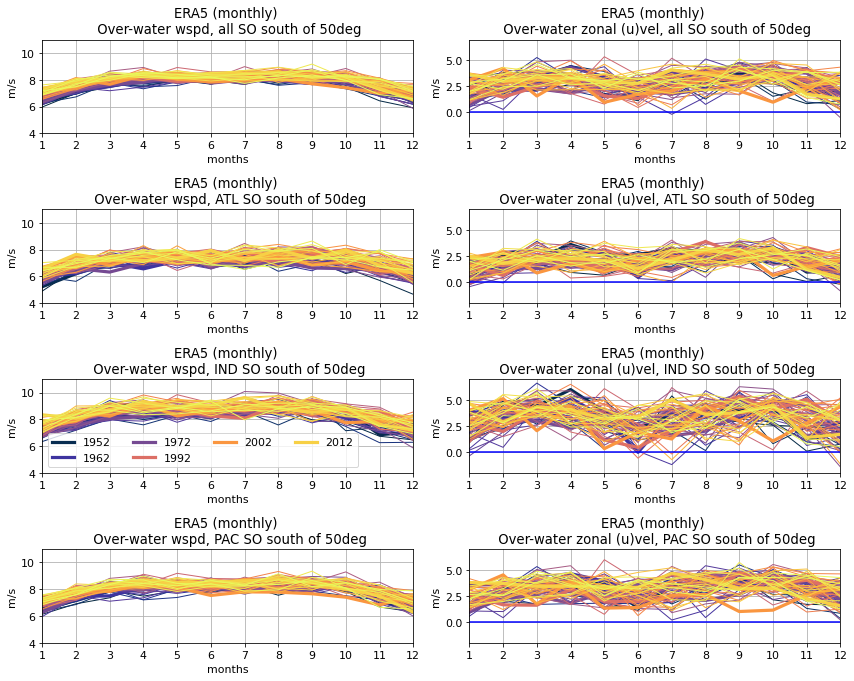

In [40]:
mons = np.arange(1,13,1)
fact = 0.6
seg = yrlen
shift = 2
tcm = cm.thermal
lw = 1

fig, axs = plt.subplots(4,2, figsize=(20*fact, 16*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

plotrs = [ERA5_monthly_byreg_wspd[:,:,0],ERA5_monthly_byreg_uvel[:,:,0],\
          ERA5_monthly_byreg_wspd[:,:,1],ERA5_monthly_byreg_uvel[:,:,1],\
          ERA5_monthly_byreg_wspd[:,:,2],ERA5_monthly_byreg_uvel[:,:,2],\
          ERA5_monthly_byreg_wspd[:,:,3],ERA5_monthly_byreg_uvel[:,:,3]]
tits = ['ERA5 (monthly) \n Over-water wspd, all SO south of 50deg','ERA5 (monthly) \n Over-water zonal (u)vel, all SO south of 50deg',
        'ERA5 (monthly) \n Over-water wspd, ATL SO south of 50deg','ERA5 (monthly) \n Over-water zonal (u)vel, ATL SO south of 50deg',
        'ERA5 (monthly) \n Over-water wspd, IND SO south of 50deg','ERA5 (monthly) \n Over-water zonal (u)vel, IND SO south of 50deg',
        'ERA5 (monthly) \n Over-water wspd, PAC SO south of 50deg','ERA5 (monthly) \n Over-water zonal (u)vel, PAC SO south of 50deg']


for p in range(0,8):
    tplt = plotrs[p]
    for y in range(0,seg):
        axs[p].set_title(tits[p])
        axs[p].plot(mons,tplt[y,:],color = tcm(1.*(y+shift)/seg), linewidth = 1)

        if ((y == 2) | (y == 12) | (y == 22) | (y == 22)\
            | (y == 42) | (y == 52 ) | (y == 62 )| (y == 72 )) :      
            axs[p].plot(mons,tplt[y,:],color = tcm(1.*(y+shift)/seg),\
                    label = f'{yrs[y]}', linewidth = lw+2.2)

axs[0].set_ylim([4,11]);axs[1].set_ylim([-2,7])
axs[2].set_ylim([4,11]);axs[3].set_ylim([-2,7])
axs[4].set_ylim([4,11]);axs[5].set_ylim([-2,7])
axs[6].set_ylim([4,11]);axs[7].set_ylim([-2,7])

for p in range(0,8):
    axs[p].grid(); axs[p].set_xlim([1,12])
    axs[p].axhline(y=0, color = 'b')
    axs[p].set_xticks(np.arange(1,13,1))
    axs[p].set_xlabel('months'); axs[p].set_ylabel('m/s')

axs[4].legend(ncol = 4, loc = 'best', )
plt.tight_layout()

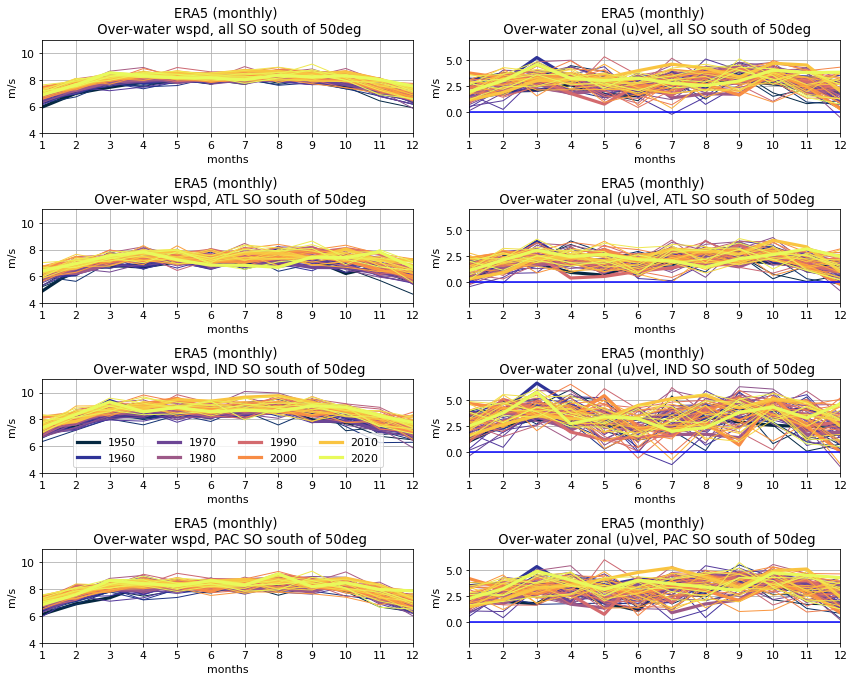

In [41]:
mons = np.arange(1,13,1)
fact = 0.6
seg = yrlen
shift = 2
tcm = cm.thermal
lw = 1

fig, axs = plt.subplots(4,2, figsize=(20*fact, 16*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

plotrs = [ERA5_monthly_byreg_wspd[:,:,0],ERA5_monthly_byreg_uvel[:,:,0],\
          ERA5_monthly_byreg_wspd[:,:,1],ERA5_monthly_byreg_uvel[:,:,1],\
          ERA5_monthly_byreg_wspd[:,:,2],ERA5_monthly_byreg_uvel[:,:,2],\
          ERA5_monthly_byreg_wspd[:,:,3],ERA5_monthly_byreg_uvel[:,:,3]]
tits = ['ERA5 (monthly) \n Over-water wspd, all SO south of 50deg','ERA5 (monthly) \n Over-water zonal (u)vel, all SO south of 50deg',
        'ERA5 (monthly) \n Over-water wspd, ATL SO south of 50deg','ERA5 (monthly) \n Over-water zonal (u)vel, ATL SO south of 50deg',
        'ERA5 (monthly) \n Over-water wspd, IND SO south of 50deg','ERA5 (monthly) \n Over-water zonal (u)vel, IND SO south of 50deg',
        'ERA5 (monthly) \n Over-water wspd, PAC SO south of 50deg','ERA5 (monthly) \n Over-water zonal (u)vel, PAC SO south of 50deg']


for p in range(0,8):
    tplt = plotrs[p]
    for y in range(0,seg):
        axs[p].set_title(tits[p])
        axs[p].plot(mons,tplt[y,:],color = tcm(1.*(y+shift)/seg), linewidth = 1)

        if ((y == 0) | (y == 10) | (y == 20) | (y == 30)\
            | (y == 40) | (y == 50 ) | (y == 60 )| (y == 70 )) :      
            axs[p].plot(mons,tplt[y,:],color = tcm(1.*(y+shift)/seg),\
                    label = f'{yrs[y]}', linewidth = lw+2.2)

axs[0].set_ylim([4,11]);axs[1].set_ylim([-2,7])
axs[2].set_ylim([4,11]);axs[3].set_ylim([-2,7])
axs[4].set_ylim([4,11]);axs[5].set_ylim([-2,7])
axs[6].set_ylim([4,11]);axs[7].set_ylim([-2,7])

for p in range(0,8):
    axs[p].grid(); axs[p].set_xlim([1,12])
    axs[p].axhline(y=0, color = 'b')
    axs[p].set_xticks(np.arange(1,13,1))
    axs[p].set_xlabel('months'); axs[p].set_ylabel('m/s')

axs[4].legend(ncol = 4, loc = 'best', )
plt.tight_layout()

##### get monthly averages the stupid way because apparently we don't know matrix operations in python; darn

In [59]:
 
MO_austral_spring_wspd = (MO_monthly_byreg_wspd[:,8,:] + MO_monthly_byreg_wspd[:,9,:] + MO_monthly_byreg_wspd[:,10,:])/3
MO_austral_spring_uvel = (MO_monthly_byreg_uvel[:,8,:] + MO_monthly_byreg_uvel[:,9,:] + MO_monthly_byreg_uvel[:,10,:])/3
NCEP_austral_spring_wspd = (NCEP_monthly_byreg_wspd[:,8,:] + NCEP_monthly_byreg_wspd[:,9,:] + NCEP_monthly_byreg_wspd[:,10,:])/3
ERA5_austral_spring_wspd = (ERA5_monthly_byreg_wspd[:,8,:] + ERA5_monthly_byreg_wspd[:,9,:] + ERA5_monthly_byreg_wspd[:,10,:])/3
ERA5_austral_spring_uvel = (ERA5_monthly_byreg_uvel[:,8,:] + ERA5_monthly_byreg_uvel[:,9,:] + ERA5_monthly_byreg_uvel[:,10,:])/3

MO_austral_summer_wspd = (MO_monthly_byreg_wspd[:,0,:] + MO_monthly_byreg_wspd[:,1,:] + MO_monthly_byreg_wspd[:,11,:])/3
MO_austral_summer_uvel = (MO_monthly_byreg_uvel[:,0,:] + MO_monthly_byreg_uvel[:,1,:] + MO_monthly_byreg_uvel[:,11,:])/3
NCEP_austral_summer_wspd = (NCEP_monthly_byreg_wspd[:,0,:] + NCEP_monthly_byreg_wspd[:,1,:] + NCEP_monthly_byreg_wspd[:,11,:])/3
ERA5_austral_summer_wspd = (ERA5_monthly_byreg_wspd[:,0,:] + ERA5_monthly_byreg_wspd[:,1,:] + ERA5_monthly_byreg_wspd[:,11,:])/3
ERA5_austral_summer_uvel = (ERA5_monthly_byreg_uvel[:,0,:] + ERA5_monthly_byreg_uvel[:,1,:] + ERA5_monthly_byreg_uvel[:,11,:])/3
 
MO_austral_autumn_wspd = (MO_monthly_byreg_wspd[:,2,:] + MO_monthly_byreg_wspd[:,3,:] + MO_monthly_byreg_wspd[:,4,:])/3
MO_austral_autumn_uvel = (MO_monthly_byreg_uvel[:,2,:] + MO_monthly_byreg_uvel[:,3,:] + MO_monthly_byreg_uvel[:,4,:])/3
NCEP_austral_autumn_wspd = (NCEP_monthly_byreg_wspd[:,2,:] + NCEP_monthly_byreg_wspd[:,3,:] + NCEP_monthly_byreg_wspd[:,4,:])/3
ERA5_austral_autumn_wspd = (ERA5_monthly_byreg_wspd[:,2,:] + ERA5_monthly_byreg_wspd[:,3,:] + ERA5_monthly_byreg_wspd[:,4,:])/3
ERA5_austral_autumn_uvel = (ERA5_monthly_byreg_uvel[:,2,:] + ERA5_monthly_byreg_uvel[:,3,:] + ERA5_monthly_byreg_uvel[:,4,:])/3

MO_austral_winter_wspd = (MO_monthly_byreg_wspd[:,6,:] + MO_monthly_byreg_wspd[:,7,:] + MO_monthly_byreg_wspd[:,5,:])/3
MO_austral_winter_uvel = (MO_monthly_byreg_uvel[:,6,:] + MO_monthly_byreg_uvel[:,7,:] + MO_monthly_byreg_uvel[:,5,:])/3
NCEP_austral_winter_wspd = (NCEP_monthly_byreg_wspd[:,6,:] + NCEP_monthly_byreg_wspd[:,7,:] + NCEP_monthly_byreg_wspd[:,5,:])/3
ERA5_austral_winter_wspd = (ERA5_monthly_byreg_wspd[:,6,:] + ERA5_monthly_byreg_wspd[:,7,:] + ERA5_monthly_byreg_wspd[:,5,:])/3
ERA5_austral_winter_uvel = (ERA5_monthly_byreg_uvel[:,6,:] + ERA5_monthly_byreg_uvel[:,7,:] + ERA5_monthly_byreg_uvel[:,5,:])/3




In [60]:
print(np.shape(MO_austral_summer_wspd))

(71, 4)


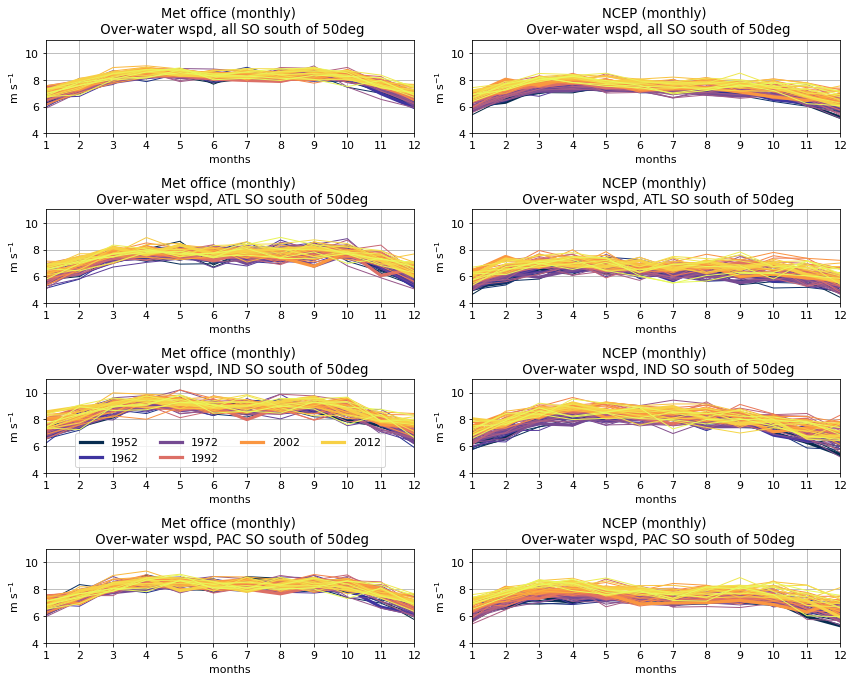

In [61]:
mons = np.arange(1,13,1)
fact = 0.6
seg = yrlen
shift = 2
tcm = cm.thermal
lw = 1

fig, axs = plt.subplots(4,2, figsize=(20*fact, 16*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

plotrs = [MO_monthly_byreg_wspd[:,:,0],NCEP_monthly_byreg_wspd[:,:,0],\
          MO_monthly_byreg_wspd[:,:,1],NCEP_monthly_byreg_wspd[:,:,1],\
          MO_monthly_byreg_wspd[:,:,2],NCEP_monthly_byreg_wspd[:,:,2],\
          MO_monthly_byreg_wspd[:,:,3],NCEP_monthly_byreg_wspd[:,:,3]]
tits = ['Met office (monthly) \n Over-water wspd, all SO south of 50deg','NCEP (monthly) \n Over-water wspd, all SO south of 50deg',
        'Met office (monthly) \n Over-water wspd, ATL SO south of 50deg','NCEP (monthly) \n Over-water wspd, ATL SO south of 50deg',
        'Met office (monthly) \n Over-water wspd, IND SO south of 50deg','NCEP (monthly) \n Over-water wspd, IND SO south of 50deg',
        'Met office (monthly) \n Over-water wspd, PAC SO south of 50deg','NCEP (monthly) \n Over-water wspd, PAC SO south of 50deg']


for p in range(0,8):
    tplt = plotrs[p]
    for y in range(0,seg):
        axs[p].set_title(tits[p])
        axs[p].plot(mons,tplt[y,:],color = tcm(1.*(y+shift)/seg), linewidth = 1)

        if ((y == 2) | (y == 12) | (y == 22) | (y == 22)\
            | (y == 42) | (y == 52 ) | (y == 62 )| (y == 72 )) :        
            axs[p].plot(mons,tplt[y,:],color = tcm(1.*(y+shift)/seg),\
                    label = f'{yrs[y]}', linewidth = lw+2.2)

# axs[0].set_ylim([4,11]);axs[1].set_ylim([-2,7])
# axs[2].set_ylim([4,11]);axs[3].set_ylim([-2,7])
# axs[4].set_ylim([4,11]);axs[5].set_ylim([-2,7])
# axs[6].set_ylim([4,11]);axs[7].set_ylim([-2,7])

for p in range(0,8):
    axs[p].grid(); axs[p].set_xlim([1,12])
    axs[p].axhline(y=0, color = 'b')
    axs[p].set_xticks(np.arange(1,13,1))
    axs[p].set_xlabel('months'); axs[p].set_ylabel('m s$^{-1}$')
    axs[p].set_ylim([4,11])

axs[4].legend(ncol = 4, loc = 'best', )
plt.tight_layout()

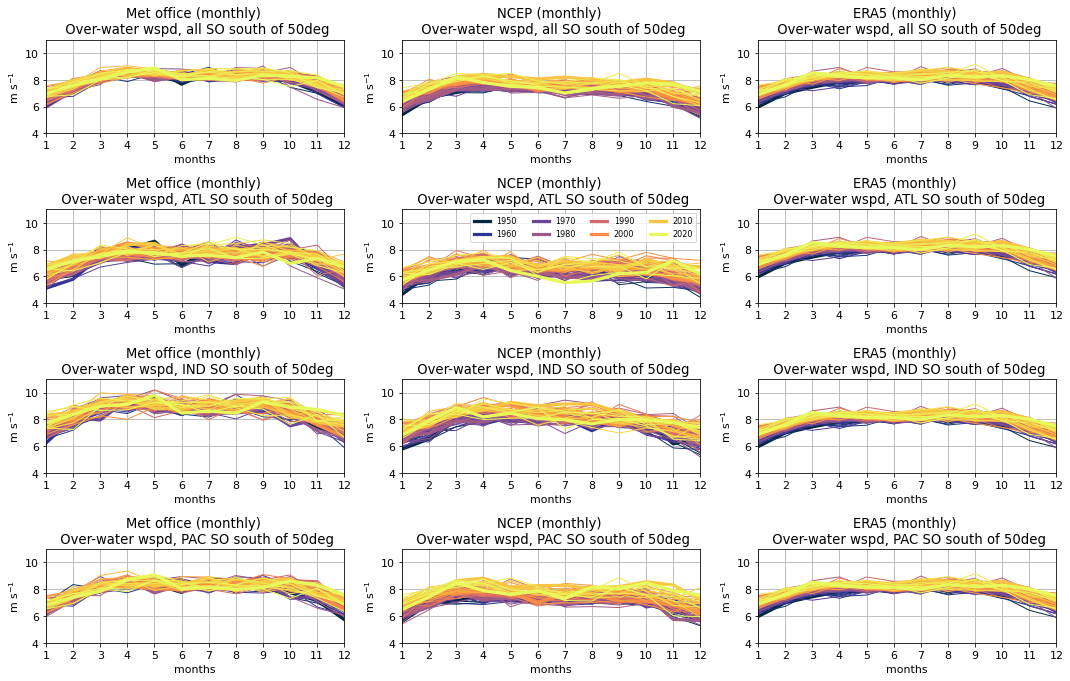

In [62]:
mons = np.arange(1,13,1)
fact = 0.6
seg = yrlen
shift = 2
tcm = cm.thermal
lw = 1

fig, axs = plt.subplots(4,3, figsize=(25*fact, 16*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

plotrs = [MO_monthly_byreg_wspd[:,:,0],NCEP_monthly_byreg_wspd[:,:,0],ERA5_monthly_byreg_wspd[:,:,0],\
          MO_monthly_byreg_wspd[:,:,1],NCEP_monthly_byreg_wspd[:,:,1],ERA5_monthly_byreg_wspd[:,:,0],\
          MO_monthly_byreg_wspd[:,:,2],NCEP_monthly_byreg_wspd[:,:,2],ERA5_monthly_byreg_wspd[:,:,0],\
          MO_monthly_byreg_wspd[:,:,3],NCEP_monthly_byreg_wspd[:,:,3],ERA5_monthly_byreg_wspd[:,:,0]]

tits = ['Met office (monthly) \n Over-water wspd, all SO south of 50deg','NCEP (monthly) \n Over-water wspd, all SO south of 50deg',
        'ERA5 (monthly) \n Over-water wspd, all SO south of 50deg',
        'Met office (monthly) \n Over-water wspd, ATL SO south of 50deg','NCEP (monthly) \n Over-water wspd, ATL SO south of 50deg',
        'ERA5 (monthly) \n Over-water wspd, ATL SO south of 50deg',
        'Met office (monthly) \n Over-water wspd, IND SO south of 50deg','NCEP (monthly) \n Over-water wspd, IND SO south of 50deg',
        'ERA5 (monthly) \n Over-water wspd, IND SO south of 50deg',
        'Met office (monthly) \n Over-water wspd, PAC SO south of 50deg','NCEP (monthly) \n Over-water wspd, PAC SO south of 50deg',
        'ERA5 (monthly) \n Over-water wspd, PAC SO south of 50deg',]


for p in range(0,12):
    tplt = plotrs[p]
    for y in range(0,seg):
        axs[p].set_title(tits[p])
        axs[p].plot(mons,tplt[y,:],color = tcm(1.*(y+shift)/seg), linewidth = 1)

        if ((y == 0) | (y == 10) | (y == 20) | (y == 30)\
            | (y == 40) | (y == 50 ) | (y == 60 )| (y == 70 )) :        
            axs[p].plot(mons,tplt[y,:],color = tcm(1.*(y+shift)/seg),\
                    label = f'{yrs[y]}', linewidth = lw+2.2)

# axs[0].set_ylim([4,11]);axs[1].set_ylim([-2,7])
# axs[2].set_ylim([4,11]);axs[3].set_ylim([-2,7])
# axs[4].set_ylim([4,11]);axs[5].set_ylim([-2,7])
# axs[6].set_ylim([4,11]);axs[7].set_ylim([-2,7])

for p in range(0,12):
    axs[p].grid(); axs[p].set_xlim([1,12])
    axs[p].axhline(y=0, color = 'b')
    axs[p].set_xticks(np.arange(1,13,1))
    axs[p].set_xlabel('months'); axs[p].set_ylabel('m s$^{-1}$')
    axs[p].set_ylim([4,11])

axs[4].legend(ncol = 4, loc = 'best', fontsize = 8 )
plt.tight_layout()

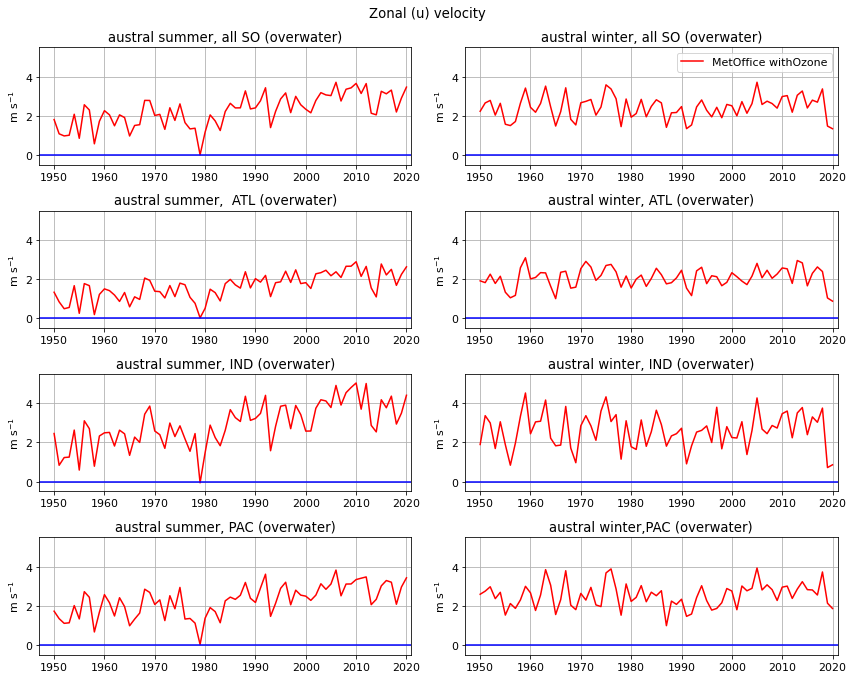

In [63]:
yrs = np.arange(1950,2021,1)

fig, axs = plt.subplots(4,2, figsize=(20*fact, 16*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

axs = axs.ravel()

axs[0].plot(yrs,MO_austral_summer_uvel[:,0], color = 'red', label = 'MetOffice withOzone')
axs[1].plot(yrs,MO_austral_winter_uvel[:,0], color = 'red', label = 'MetOffice withOzone')

axs[2].plot(yrs,MO_austral_summer_uvel[:,1], color = 'red')
axs[3].plot(yrs,MO_austral_winter_uvel[:,1], color = 'red')

axs[4].plot(yrs,MO_austral_summer_uvel[:,2], color = 'red')
axs[5].plot(yrs,MO_austral_winter_uvel[:,2], color = 'red')

axs[6].plot(yrs,MO_austral_summer_uvel[:,3], color = 'red')
axs[7].plot(yrs,MO_austral_winter_uvel[:,3], color = 'red')

tits = ['austral summer, all SO (overwater)', 'austral winter, all SO (overwater)',
        'austral summer,  ATL (overwater)', 'austral winter, ATL (overwater)',
        'austral summer, IND (overwater)', 'austral winter, IND (overwater)',
        'austral summer, PAC (overwater)', 'austral winter,PAC (overwater)']

for p in range(0,8):
    axs[p].grid(); axs[p].set_xlim([1947,2021])
    axs[p].set_xticks(np.arange(1950,2030,10))
    axs[p].set_ylabel('m s$^{-1}$')
    axs[p].set_ylim([-0.5,5.5])
    axs[p].axhline(y=0, color = 'b')
    axs[p].set_title(tits[p])
    
axs[1].legend()
        
plt.suptitle('Zonal (u) velocity')
plt.tight_layout()

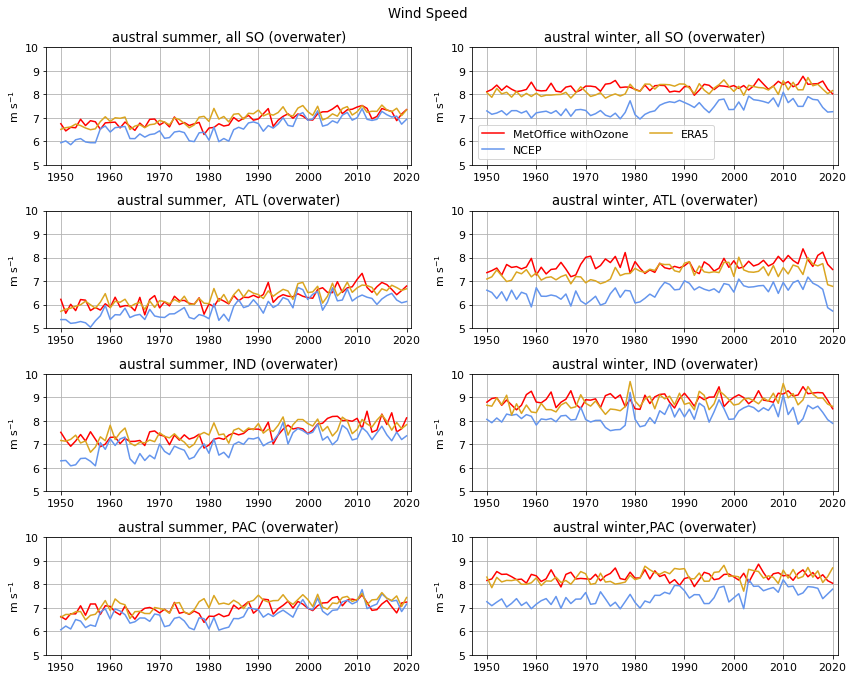

In [64]:
fig, axs = plt.subplots(4,2, figsize=(20*fact, 16*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

axs[0].plot(yrs,MO_austral_summer_wspd[:,0], color = 'red', label = 'MetOffice withOzone')
axs[1].plot(yrs,MO_austral_winter_wspd[:,0], color = 'red', label = 'MetOffice withOzone')

axs[2].plot(yrs,MO_austral_summer_wspd[:,1], color = 'red')
axs[3].plot(yrs,MO_austral_winter_wspd[:,1], color = 'red')

axs[4].plot(yrs,MO_austral_summer_wspd[:,2], color = 'red')
axs[5].plot(yrs,MO_austral_winter_wspd[:,2], color = 'red')

axs[6].plot(yrs,MO_austral_summer_wspd[:,3], color = 'red')
axs[7].plot(yrs,MO_austral_winter_wspd[:,3], color = 'red')

axs[0].plot(yrs,NCEP_austral_summer_wspd[:,0], color = 'cornflowerblue', label = 'NCEP')
axs[1].plot(yrs,NCEP_austral_winter_wspd[:,0], color = 'cornflowerblue', label = 'NCEP')

axs[2].plot(yrs,NCEP_austral_summer_wspd[:,1], color = 'cornflowerblue')
axs[3].plot(yrs,NCEP_austral_winter_wspd[:,1], color = 'cornflowerblue')

axs[4].plot(yrs,NCEP_austral_summer_wspd[:,2], color = 'cornflowerblue')
axs[5].plot(yrs,NCEP_austral_winter_wspd[:,2], color = 'cornflowerblue')

axs[6].plot(yrs,NCEP_austral_summer_wspd[:,3], color = 'cornflowerblue')
axs[7].plot(yrs,NCEP_austral_winter_wspd[:,3], color = 'cornflowerblue')

axs[0].plot(yrs,ERA5_austral_summer_wspd[:,0], color = 'goldenrod', label = 'ERA5')
axs[1].plot(yrs,ERA5_austral_winter_wspd[:,0], color = 'goldenrod', label = 'ERA5')

axs[2].plot(yrs,ERA5_austral_summer_wspd[:,1], color = 'goldenrod')
axs[3].plot(yrs,ERA5_austral_winter_wspd[:,1], color = 'goldenrod')

axs[4].plot(yrs,ERA5_austral_summer_wspd[:,2], color = 'goldenrod')
axs[5].plot(yrs,ERA5_austral_winter_wspd[:,2], color = 'goldenrod')

axs[6].plot(yrs,ERA5_austral_summer_wspd[:,3], color = 'goldenrod')
axs[7].plot(yrs,ERA5_austral_winter_wspd[:,3], color = 'goldenrod')

tits = ['austral summer, all SO (overwater)', 'austral winter, all SO (overwater)',
        'austral summer,  ATL (overwater)', 'austral winter, ATL (overwater)',
        'austral summer, IND (overwater)', 'austral winter, IND (overwater)',
        'austral summer, PAC (overwater)', 'austral winter,PAC (overwater)']

for p in range(0,8):
    axs[p].grid(); axs[p].set_xlim([1947,2021])
    axs[p].set_xticks(np.arange(1950,2030,10))
    axs[p].set_ylabel('m s$^{-1}$')
    axs[p].set_ylim([5,10])
    axs[p].set_title(tits[p])
    
axs[1].legend(ncol = 2)
        
plt.suptitle('Wind Speed')
plt.tight_layout()

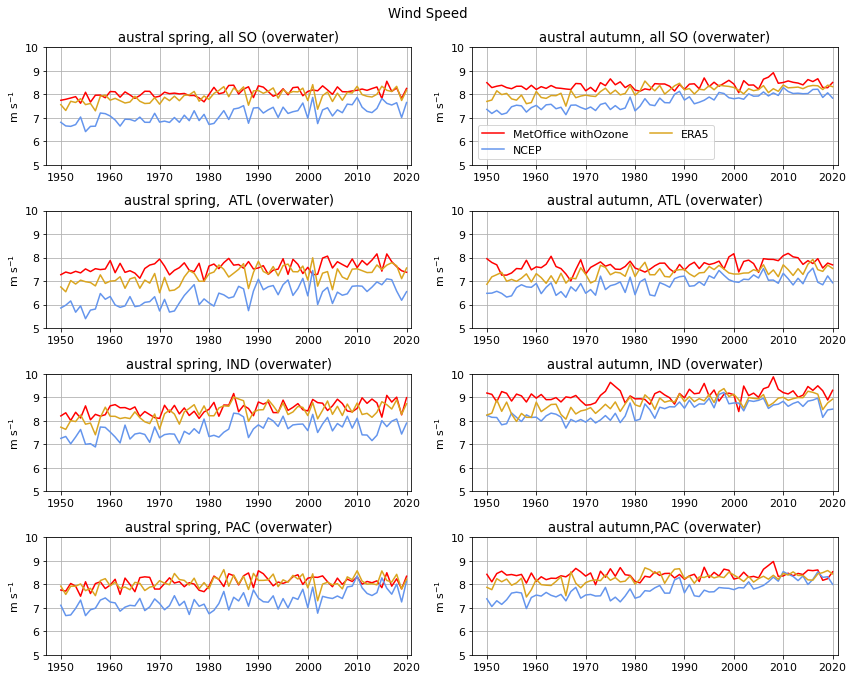

In [71]:
fact = 0.6
fig, axs = plt.subplots(4,2, figsize=(20*fact, 16*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


axs[0].plot(yrs,MO_austral_spring_wspd[:,0], color = 'red', label = 'MetOffice withOzone')
axs[1].plot(yrs,MO_austral_autumn_wspd[:,0], color = 'red', label = 'MetOffice withOzone')

axs[2].plot(yrs,MO_austral_spring_wspd[:,1], color = 'red')
axs[3].plot(yrs,MO_austral_autumn_wspd[:,1], color = 'red')

axs[4].plot(yrs,MO_austral_spring_wspd[:,2], color = 'red')
axs[5].plot(yrs,MO_austral_autumn_wspd[:,2], color = 'red')

axs[6].plot(yrs,MO_austral_spring_wspd[:,3], color = 'red')
axs[7].plot(yrs,MO_austral_autumn_wspd[:,3], color = 'red')

axs[0].plot(yrs,NCEP_austral_spring_wspd[:,0], color = 'cornflowerblue', label = 'NCEP')
axs[1].plot(yrs,NCEP_austral_autumn_wspd[:,0], color = 'cornflowerblue', label = 'NCEP')

axs[2].plot(yrs,NCEP_austral_spring_wspd[:,1], color = 'cornflowerblue')
axs[3].plot(yrs,NCEP_austral_autumn_wspd[:,1], color = 'cornflowerblue')

axs[4].plot(yrs,NCEP_austral_spring_wspd[:,2], color = 'cornflowerblue')
axs[5].plot(yrs,NCEP_austral_autumn_wspd[:,2], color = 'cornflowerblue')

axs[6].plot(yrs,NCEP_austral_spring_wspd[:,3], color = 'cornflowerblue')
axs[7].plot(yrs,NCEP_austral_autumn_wspd[:,3], color = 'cornflowerblue')

axs[0].plot(yrs,ERA5_austral_spring_wspd[:,0], color = 'goldenrod', label = 'ERA5')
axs[1].plot(yrs,ERA5_austral_autumn_wspd[:,0], color = 'goldenrod', label = 'ERA5')

axs[2].plot(yrs,ERA5_austral_spring_wspd[:,1], color = 'goldenrod')
axs[3].plot(yrs,ERA5_austral_autumn_wspd[:,1], color = 'goldenrod')

axs[4].plot(yrs,ERA5_austral_spring_wspd[:,2], color = 'goldenrod')
axs[5].plot(yrs,ERA5_austral_autumn_wspd[:,2], color = 'goldenrod')

axs[6].plot(yrs,ERA5_austral_spring_wspd[:,3], color = 'goldenrod')
axs[7].plot(yrs,ERA5_austral_autumn_wspd[:,3], color = 'goldenrod')

tits = ['austral spring, all SO (overwater)', 'austral autumn, all SO (overwater)',
        'austral spring,  ATL (overwater)', 'austral autumn, ATL (overwater)',
        'austral spring, IND (overwater)', 'austral autumn, IND (overwater)',
        'austral spring, PAC (overwater)', 'austral autumn,PAC (overwater)']

for p in range(0,8):
    axs[p].grid(); axs[p].set_xlim([1947,2021])
    axs[p].set_xticks(np.arange(1950,2030,10))
    axs[p].set_ylabel('m s$^{-1}$')
    axs[p].set_ylim([5,10])
    axs[p].set_title(tits[p])
    
axs[1].legend(ncol = 2)
        
plt.suptitle('Wind Speed')
plt.tight_layout()

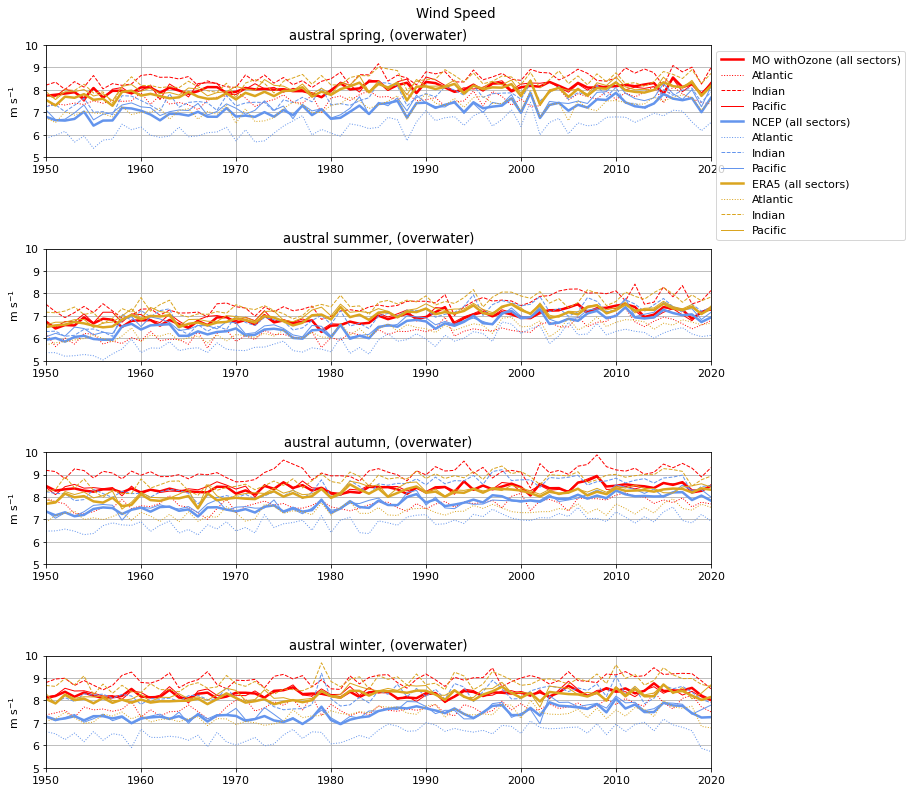

In [76]:
fact = 0.4

fig, axs = plt.subplots(4,1, figsize=(32*fact, 28*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

axs[0].plot(yrs,MO_austral_spring_wspd[:,0], color = 'red', \
            label = 'MO withOzone (all sectors)', linewidth = 2.5)
axs[1].plot(yrs,MO_austral_summer_wspd[:,0], color = 'red', \
            label = 'MO withOzone (all sectors)', linewidth = 2.5)

axs[0].plot(yrs,MO_austral_spring_wspd[:,1], color = 'red', linestyle = ':', linewidth =1, label = 'Atlantic')
axs[1].plot(yrs,MO_austral_summer_wspd[:,1], color = 'red', linestyle = ':', linewidth =1, label = 'Atlantic')

axs[0].plot(yrs,MO_austral_spring_wspd[:,2], color = 'red', linestyle = '--', linewidth =1, label = 'Indian')
axs[1].plot(yrs,MO_austral_summer_wspd[:,2], color = 'red', linestyle = '--', linewidth =1, label = 'Indian')

axs[0].plot(yrs,MO_austral_spring_wspd[:,3], color = 'red', linestyle = '-', linewidth =1, label = 'Pacific')
axs[1].plot(yrs,MO_austral_summer_wspd[:,3], color = 'red', linestyle = '-', linewidth =1, label = 'Pacific')

axs[0].plot(yrs,NCEP_austral_spring_wspd[:,0], color = 'cornflowerblue', linewidth = 2.5, label = 'NCEP (all sectors)')
axs[1].plot(yrs,NCEP_austral_summer_wspd[:,0], color = 'cornflowerblue', linewidth = 2.5, label = 'NCEP (all sectors)')

axs[0].plot(yrs,NCEP_austral_spring_wspd[:,1], color = 'cornflowerblue', linestyle = ':', linewidth =1, label = 'Atlantic')
axs[1].plot(yrs,NCEP_austral_summer_wspd[:,1], color = 'cornflowerblue', linestyle = ':', linewidth =1, label = 'Atlantic')

axs[0].plot(yrs,NCEP_austral_spring_wspd[:,2], color = 'cornflowerblue', linestyle = '--', linewidth =1, label = 'Indian')
axs[1].plot(yrs,NCEP_austral_summer_wspd[:,2], color = 'cornflowerblue', linestyle = '--', linewidth =1, label = 'Indian')

axs[0].plot(yrs,NCEP_austral_spring_wspd[:,3], color = 'cornflowerblue', linestyle = '-', linewidth =1, label = 'Pacific')
axs[1].plot(yrs,NCEP_austral_summer_wspd[:,3], color = 'cornflowerblue', linestyle = '-', linewidth =1, label = 'Pacific')

axs[0].plot(yrs,ERA5_austral_spring_wspd[:,0], color = 'goldenrod', linewidth = 2.5, label = 'ERA5 (all sectors)')
axs[1].plot(yrs,ERA5_austral_summer_wspd[:,0], color = 'goldenrod', linewidth = 2.5, label = 'ERA5 (all sectors)')

axs[0].plot(yrs,ERA5_austral_spring_wspd[:,1], color = 'goldenrod', linestyle = ':', linewidth =1, label = 'Atlantic')
axs[1].plot(yrs,ERA5_austral_summer_wspd[:,1], color = 'goldenrod', linestyle = ':', linewidth =1, label = 'Atlantic')

axs[0].plot(yrs,ERA5_austral_spring_wspd[:,2], color = 'goldenrod', linestyle = '--', linewidth =1, label = 'Indian')
axs[1].plot(yrs,ERA5_austral_summer_wspd[:,2], color = 'goldenrod', linestyle = '--', linewidth =1, label = 'Indian')

axs[0].plot(yrs,ERA5_austral_spring_wspd[:,3], color = 'goldenrod', linestyle = '-', linewidth =1, label = 'Pacific')
axs[1].plot(yrs,ERA5_austral_summer_wspd[:,3], color = 'goldenrod', linestyle = '-', linewidth =1, label = 'Pacific')

axs[2].plot(yrs,MO_austral_autumn_wspd[:,0], color = 'red', \
            label = 'MO withOzone (all sectors)', linewidth = 2.5)
axs[3].plot(yrs,MO_austral_winter_wspd[:,0], color = 'red', \
            label = 'MO withOzone (all sectors)', linewidth = 2.5)

axs[2].plot(yrs,MO_austral_autumn_wspd[:,1], color = 'red', linestyle = ':', linewidth =1, label = 'Atlantic')
axs[3].plot(yrs,MO_austral_winter_wspd[:,1], color = 'red', linestyle = ':', linewidth =1, label = 'Atlantic')

axs[2].plot(yrs,MO_austral_autumn_wspd[:,2], color = 'red', linestyle = '--', linewidth =1, label = 'Indian')
axs[3].plot(yrs,MO_austral_winter_wspd[:,2], color = 'red', linestyle = '--', linewidth =1, label = 'Indian')

axs[2].plot(yrs,MO_austral_autumn_wspd[:,3], color = 'red', linestyle = '-', linewidth =1, label = 'Pacific')
axs[3].plot(yrs,MO_austral_winter_wspd[:,3], color = 'red', linestyle = '-', linewidth =1, label = 'Pacific')

axs[2].plot(yrs,NCEP_austral_autumn_wspd[:,0], color = 'cornflowerblue', linewidth = 2.5, label = 'NCEP (all sectors)')
axs[3].plot(yrs,NCEP_austral_winter_wspd[:,0], color = 'cornflowerblue', linewidth = 2.5, label = 'NCEP (all sectors)')

axs[2].plot(yrs,NCEP_austral_autumn_wspd[:,1], color = 'cornflowerblue', linestyle = ':', linewidth =1, label = 'Atlantic')
axs[3].plot(yrs,NCEP_austral_winter_wspd[:,1], color = 'cornflowerblue', linestyle = ':', linewidth =1, label = 'Atlantic')

axs[2].plot(yrs,NCEP_austral_autumn_wspd[:,2], color = 'cornflowerblue', linestyle = '--', linewidth =1, label = 'Indian')
axs[3].plot(yrs,NCEP_austral_winter_wspd[:,2], color = 'cornflowerblue', linestyle = '--', linewidth =1, label = 'Indian')

axs[2].plot(yrs,NCEP_austral_autumn_wspd[:,3], color = 'cornflowerblue', linestyle = '-', linewidth =1, label = 'Pacific')
axs[3].plot(yrs,NCEP_austral_winter_wspd[:,3], color = 'cornflowerblue', linestyle = '-', linewidth =1, label = 'Pacific')

axs[2].plot(yrs,ERA5_austral_autumn_wspd[:,0], color = 'goldenrod', linewidth = 2.5, label = 'ERA5 (all sectors)')
axs[3].plot(yrs,ERA5_austral_winter_wspd[:,0], color = 'goldenrod', linewidth = 2.5, label = 'ERA5 (all sectors)')

axs[2].plot(yrs,ERA5_austral_autumn_wspd[:,1], color = 'goldenrod', linestyle = ':', linewidth =1, label = 'Atlantic')
axs[3].plot(yrs,ERA5_austral_winter_wspd[:,1], color = 'goldenrod', linestyle = ':', linewidth =1, label = 'Atlantic')

axs[2].plot(yrs,ERA5_austral_autumn_wspd[:,2], color = 'goldenrod', linestyle = '--', linewidth =1, label = 'Indian')
axs[3].plot(yrs,ERA5_austral_winter_wspd[:,2], color = 'goldenrod', linestyle = '--', linewidth =1, label = 'Indian')

axs[2].plot(yrs,ERA5_austral_autumn_wspd[:,3], color = 'goldenrod', linestyle = '-', linewidth =1, label = 'Pacific')
axs[3].plot(yrs,ERA5_austral_winter_wspd[:,3], color = 'goldenrod', linestyle = '-', linewidth =1, label = 'Pacific')

tits = ['austral spring, (overwater)', 'austral summer, (overwater)',
        'austral autumn, (overwater)', 'austral winter, (overwater)',
        'austral summer,  ATL (overwater)', 'austral winter, ATL (overwater)',
        'austral summer, IND (overwater)', 'austral winter, IND (overwater)',
        'austral summer, PAC (overwater)', 'austral winter,PAC (overwater)']

for p in range(0,4):
    axs[p].grid(); axs[p].set_xlim([1950,2020])
    axs[p].set_xticks(np.arange(1950,2030,10))
    axs[p].set_ylabel('m s$^{-1}$')
    axs[p].set_ylim([5,10])
    axs[p].set_title(tits[p])
    
axs[0].legend(bbox_to_anchor = [1, 1])
        
plt.suptitle('Wind Speed')
plt.tight_layout()